In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from pymatgen.util.plotting_utils import get_publication_quality_plot
from pyqe.qe_output import *

mpl.rcParams['axes.linewidth']=3
mpl.rcParams['lines.markeredgewidth']=3
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['lines.markersize']=5
mpl.rcParams['xtick.major.width']=3
mpl.rcParams['xtick.major.size']=8
mpl.rcParams['xtick.minor.width']=3
mpl.rcParams['xtick.minor.size']=4
mpl.rcParams['ytick.major.width']=3
mpl.rcParams['ytick.major.size']=8
mpl.rcParams['ytick.minor.width']=3
mpl.rcParams['ytick.minor.size']=4

40.0


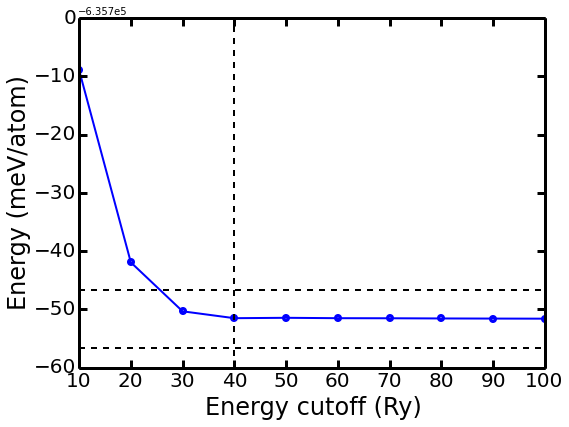

In [2]:
b1 = BasicAnalyzer('Si_energy_ecut.csv','ecut',0.5)
plt1 = get_convergence_plot(b1.df,'ecut','energy',5)
plt1.xlabel('Energy cutoff (Ry)')
plt1.ylabel('Energy (meV/atom)')
plt1.tight_layout()
plt1.savefig('Q1.pdf')

8


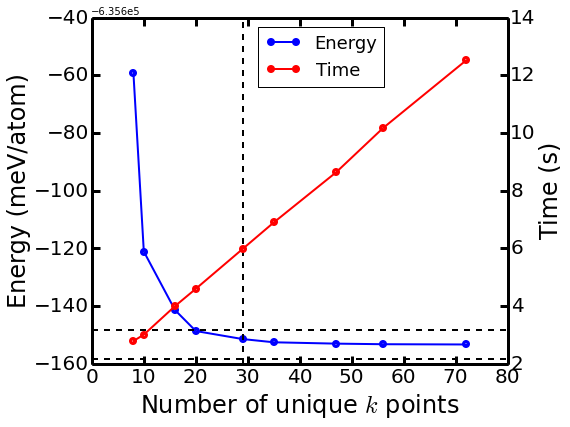

In [3]:
b2 = BasicAnalyzer('Si_energy_kpts.csv','nkpts',0.5)
energy = b2['energy']
nkpts = b2['nkpts']
df2 = analyze_kgrid(b2)
k = get_converged_param(df2,'kgrid','energy',5)
print k
nk = get_converged_param(df2,'nkpts','energy',5)
plt2 = get_publication_quality_plot(8,6)
ax1 = plt2.gca()
e = ax1.plot(df2.nkpts,df2.energy,'bo-',fillstyle='none',label='Energy')
ax1.set_ylabel('Energy (meV/atom)')
ax1.set_xlabel('Number of unique $k$ points')
xmin, xmax = ax1.get_xlim()
for elim in [energy[-1]-5,energy[-1]+5]:
    ax1.plot([xmin,xmax],[elim,elim],'k--',lw=2)
ax1.axvline(x=nk,color='k',linestyle='dashed',lw=2)
ax2 = ax1.twinx()
t = ax2.plot(df2.nkpts,df2.time,'ro-',fillstyle='none',label='Time')
ax2.set_ylabel('Time (s)',fontsize=24)
ax2.yaxis.set_tick_params(labelsize=20)
lns = e + t
labs = [l.get_label() for l in lns]
plt2.legend(lns, labs, loc=(0.4,0.8),fontsize=18)
plt2.tight_layout()
plt2.savefig('Q2.pdf')

30.0


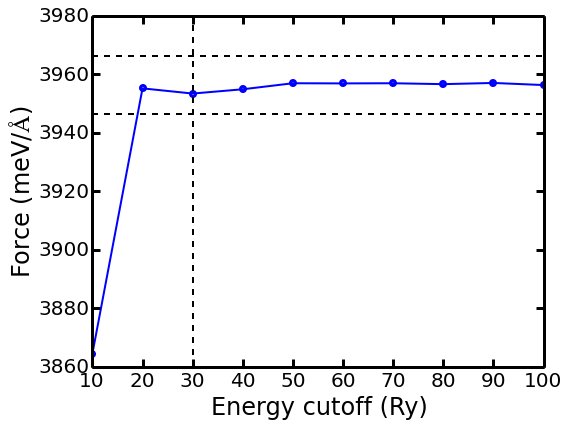

In [4]:
b3 = BasicAnalyzer('Si_force_ecut.csv','ecut',0.5)
plt3 = get_convergence_plot(b3.df,'ecut','total_force',10)
plt3.xlabel('Energy cutoff (Ry)')
plt3.ylabel('Force (meV/$\AA$)')
plt3.tight_layout()
plt3.savefig('Q3.pdf')

9
205.0


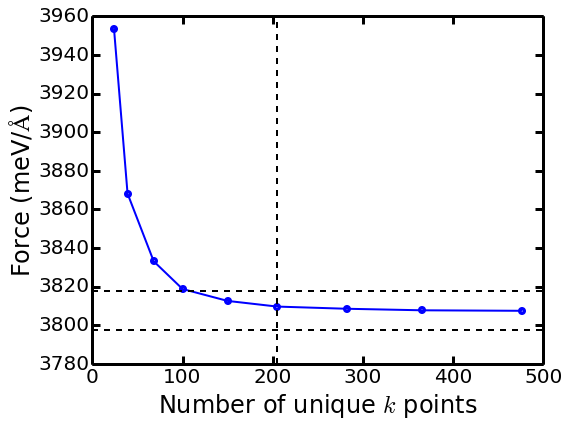

In [5]:
b4 = BasicAnalyzer('Si_force_kpts.csv','nkpts',0.5)
dfk = analyze_kgrid(b4)
print get_converged_param(dfk,'kgrid','total_force',10)
plt4 = get_convergence_plot(b4.df,'nkpts','total_force',10)
plt4.xlabel('Number of unique $k$ points')
plt4.ylabel('Force (meV/$\AA$)')
plt4.tight_layout()
plt4.savefig('Q4.pdf')

30.0


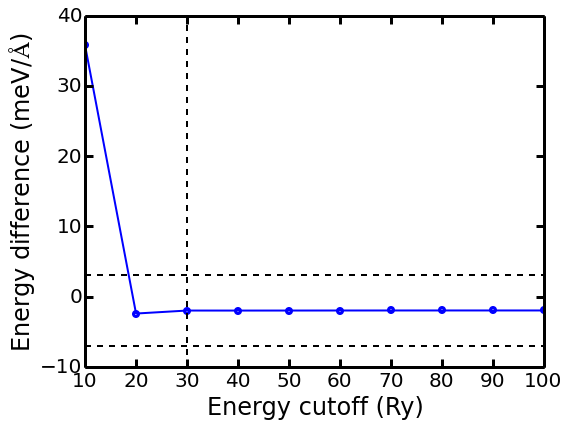

In [6]:
b5e = BasicAnalyzer('Si_ed_ecut.csv','ecut',0.5)
df5e = b5e.df
df5e['ed'] = df5e.energy - b1.df.energy
plt5e = get_convergence_plot(df5e,'ecut','ed',5)
plt5e.xlabel('Energy cutoff (Ry)')
plt5e.ylabel('Energy difference (meV/$\AA$)')
plt5e.tight_layout()
plt5e.savefig('Q5_e.pdf')

5
10.0


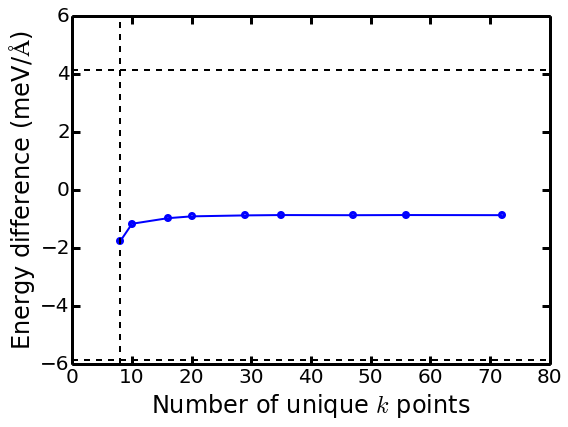

In [7]:
b5k = BasicAnalyzer('Si_ed_kpts.csv','nkpts',0.5)
df5k = analyze_kgrid(b5k)
df5k['ed'] = df5k.energy - b2.df.energy
print get_converged_param(df5k,'kgrid','ed',5)
plt5k = get_convergence_plot(df5k,'nkpts','ed',5)
plt5k.xlabel('Number of unique $k$ points')
plt5k.ylabel('Energy difference (meV/$\AA$)')
plt5k.axvline(x=8,color='k',linestyle='dashed',lw=2)
plt5k.tight_layout()
plt5k.savefig('Q5_k.pdf')